#### In this notebook we load the preprocessed datasaset from the notebook "Preprocessing0" and see how different models perform.

In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
'''import matplotlib.pyplot as plt
'%matplotlib inline'''

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [2]:
#Load the dataset from Preprocessinc0.ipynb
print("Loading Dataset from preprocessing0.ipynb")
dataset = pd.read_csv("./BagOfWordDataSet0.csv")

Loading Dataset from preprocessing0.ipynb


In [3]:
dataset.head()

,Unnamed: 0,!,"!""?","""","""/proj3/mypipe""","""100%","""104""","""200","""700000""","""?",...,“writing”,…,…just,…only,₹,"₹15,000",√,√3√3√3√3√3?,❓?,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset = dataset.drop('Unnamed: 0', 1)
dataset.head()

,!,"!""?","""","""/proj3/mypipe""","""100%","""104""","""200","""700000""","""?","""a",...,“writing”,…,…just,…only,₹,"₹15,000",√,√3√3√3√3√3?,❓?,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = dataset['TARGET']
variables = dataset.columns[dataset.columns!='TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [6]:
X = dataset[variables]
X.head()

,!,"!""?","""","""/proj3/mypipe""","""100%","""104""","""200","""700000""","""?","""a",...,“white,“writing”,…,…just,…only,₹,"₹15,000",√,√3√3√3√3√3?,❓?
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#splitting train and test set in a stratified manner
print("splitting train and test set in a stratified manner")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123, stratify = y)

splitting train and test set in a stratified manner


In [8]:
## save testSetFrom this preprocessing for comparison purposes
from pandas import *
df_test= concat([X_test, y_test], axis=1, sort=False)
df_test.to_csv(r'./testSet0.csv')

## Evaluating Classification - Accuracy
Accuracy is the most known and most widely used measure of classification performance. It measure the percentage of correct classification achieved by the model.

$accuracy = \frac{number of correclty classified examples}{number of examples}$

## Confusion Matrix
Accuracy evaluates the percentage of correct predictions but not the errors are equal. To have a better sense of how a classifier model performs the confusion matrix is usually examined. The confusion matrix includes

- <b>the true positives,</b> the number of examples labeled as positives and prediceted as positives
- <b>the true negatives,</b> the number of examples labeled as negatives and prediceted as negatives
- <b>the false positives,</b> the number of examples labeled as negatives and prediceted as positives
- <b>the false negatives,</b> the number of examples labeled as positives and prediceted as negatives

The confusion matrix is typically shown as,


|  | Predicted Positive | Predicted Negative |
|-----------------:|:------------------:|:------------------:|
| Labeled Positive | TP | FN |
| Labeled Negative | FP | TN | 

We can compute the confusion matrix for the three models we developed.

In [9]:
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])


In [10]:
def F1Score ( precision, recall):
    f1 = 2 * precision * recall / (precision + recall)
    return f1

## Precision and Recall
Precision and recall are alternative measures to plain accuracy introduced in the area of information retrieval and search engine. Precision focuses on the percentage of correctly classified positive examples or in the information retrieval context represents the percentage of actually good documents that have been shown as a result. Recall focuses on the percentage of positively classified examples with respect to the number of existing good documents or in the information retrieval context, recall represents the percentage of good documents shown with respect to the existing ones.

$precision = \frac{TP}{TP+FP}$

$recall = \frac{TP}{TP+FN}$

Precision and Recall will be usefull also in this scenario where the positive instancies are much less than the negative ones.

Positive instances account for about the 6% of the dataset.
This means that a classifier that predicts everything as negative will have an accuracy around 94% that is pretty high but will not be useful because the goal of the task is to correctly find the positive instances.

That's the reason why we'll check also the values of precision and recall.

Finally we will consider also the F1-score:
$ F1 = \frac{2 * Precison * Recall}{Precison + Recall}$

# Naive Bayes 

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
print()
print("Naive Bayes:")
model = MultinomialNB().fit(X_train, y_train) 


Naive Bayes:


In [13]:
#Train Accuracy
predicted = model.predict(X_train)
print("Train Accuracy:")
print(np.mean(predicted == y_train)) 

#Test Accuracy
predicted = model.predict(X_test)
print("Test Accuracy:")
print(np.mean(predicted == y_test)) 

Train Accuracy:
0.963
Test Accuracy:
0.933


In [14]:
print("Confusion Matrix - Naive Bayes ")
PrintConfusionMatrix(model, y_test, predicted)

Confusion Matrix - Naive Bayes 
	0	1
0	 922 	 16
1	 51 	 11


In [15]:
print("Precision %3.2f" % precision_score(y_test,predicted))
print("Recall    %3.2f" % recall_score(y_test,predicted))
print("F1    %3.2f" % F1Score( precision_score(y_test,predicted), recall_score(y_test,predicted)))

Precision 0.41
Recall    0.18
F1    0.25


If we focus on the above Recall we can say that only the 26% of positive instances are been actually predicted as positive and this means that the classifier is not performing well.

In [16]:
### save the model as baseline for comparison purposes
from joblib import dump
print("Saving the final model..")
dump(model, 'NaiveBayesBaseline.joblib')
print("done!")

Saving the final model..
done!


# Logistic Regression


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
print()
print("Logistic Regression:")
ln = LogisticRegression(solver = 'liblinear')
ln.fit(X_train, y_train);
predictions = ln.predict(X_train)
# check  training accuracy
import sklearn.metrics as mt
acc = mt.accuracy_score(predictions,y_train)
print( "Training Accuracy: " + str(acc))


Logistic Regression:
Training Accuracy: 0.9846666666666667


In [19]:
from sklearn.model_selection import cross_val_score
predictions = ln.predict(X_test)

acc = mt.accuracy_score(predictions,y_test)
print( "Test Accuracy on original distribution: " + str(acc))
scores = cross_val_score(ln, X_train, y_train, cv=10)
#print(scores)
print("Test Accuracy with CV: " + str(scores.mean()))

Test Accuracy on original distribution: 0.943
Test Accuracy with CV: 0.942887888064608


In [20]:
print("Confusion Matrix - Logistic Regression")
PrintConfusionMatrix(ln, y_test, predictions)

Confusion Matrix - Logistic Regression
	0	1
0	 928 	 10
1	 47 	 15


In [21]:
print("Precision %3.2f" % precision_score(y_test,predictions))
print("Recall    %3.2f" % recall_score(y_test,predictions))
print("F1    %3.2f" % F1Score( precision_score(y_test,predicted), recall_score(y_test,predicted)))

Precision 0.60
Recall    0.24
F1    0.25


Also here the values of precision and recall are not satisfying.

##### We will need also a validation set for parameters tuning:

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123, stratify = y_train)

# Ridge

In [23]:
from sklearn.linear_model import RidgeClassifier

In [24]:
print()
print("Ridge:")
alphaValue = [0.1,1,10,20,40,80,160,250]
accValues = []
f1Values = []

for alph in alphaValue:
    
    #Train
    clf = RidgeClassifier(alpha=alph)
    clf.fit(X_train, y_train)
    print("alpha: " + str(alph))
    print()
    predictions = clf.predict(X_train) 
    acc = mt.accuracy_score(predictions,y_train)
    print( "Training Accuracy: " + str(acc))
    
    #Test
    predictions = clf.predict(X_val)
    accTest = mt.accuracy_score(predictions,y_val)
    accValues.append(accTest)
    print("Test Accuracy: " + str(accTest))
    
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1score)
    print("F1    %3.2f" % f1score )

    print()
    


Ridge:
alpha: 0.1

Training Accuracy: 1.0
Test Accuracy: 0.9444444444444444
Precision on test 0.62
Recall on test  0.29
F1    0.39

alpha: 1

Training Accuracy: 0.9996296296296296
Test Accuracy: 0.9433333333333334
Precision on test 0.67
Recall on test  0.18
F1    0.28

alpha: 10

Training Accuracy: 0.9741975308641976
Test Accuracy: 0.9433333333333334
Precision on test 1.00
Recall on test  0.09
F1    0.16

alpha: 20

Training Accuracy: 0.9606172839506173
Test Accuracy: 0.9422222222222222
Precision on test 1.00
Recall on test  0.07
F1    0.13

alpha: 40

Training Accuracy: 0.9504938271604938
Test Accuracy: 0.94
Precision on test 1.00
Recall on test  0.04
F1    0.07

alpha: 80

Training Accuracy: 0.9433333333333334
Test Accuracy: 0.9388888888888889
Precision on test 1.00
Recall on test  0.02
F1    0.04

alpha: 160

Training Accuracy: 0.9397530864197531
Test Accuracy: 0.9388888888888889
Precision on test 1.00
Recall on test  0.02
F1    0.04

alpha: 250

Training Accuracy: 0.93888888888888

In [25]:
#### to run convert this cell from mardown to code   
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

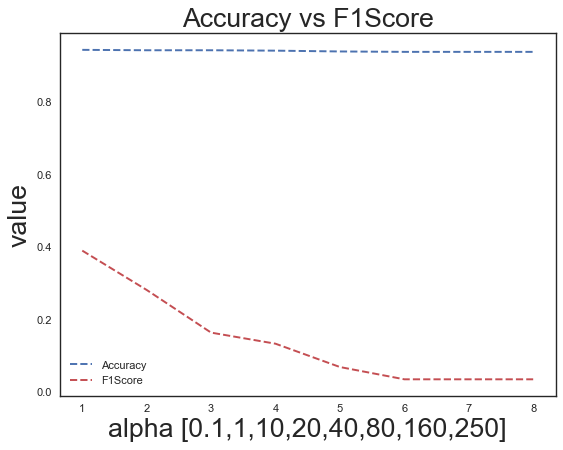

In [26]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.1,1,10,20,40,80,160,250]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## Lasso

In [27]:
from sklearn import linear_model


In [28]:
print()
print("Lasso:")
alphaValue = [0.001, 0.01,0.1,1,10]
accValues = []
f1Values = []

for alph in alphaValue:

    #Train
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X_train,y_train);
    predictions = clf.predict(X_train)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("alpha: " + str(alph))
    print("Train Accuracy:")
    print(mt.accuracy_score(predictions,y_train))
    
    #Test
    predictions = clf.predict(X_val)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    print(acc)
    accValues.append(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score =  F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" % f1Score)

    print()


Lasso:
alpha: 0.001
Train Accuracy:
0.9396296296296296
Test Accuracy:
0.94
Precision on test 1.00
Recall on test  0.04
F1    0.07

alpha: 0.01
Train Accuracy:
0.9379012345679012
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
F1    nan

alpha: 0.1
Train Accuracy:
0.9379012345679012
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
F1    nan

alpha: 1
Train Accuracy:
0.9379012345679012
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
F1    nan

alpha: 10
Train Accuracy:
0.9379012345679012
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
F1    nan



#### to run convert this cell from mardown to code  
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.001, 0.01,0.1,1,10]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [30]:
print()
print("KNN:")
k_range = list(range(1, 30))
accValues = []
f1Values = []
for k in k_range:
    if (k%2 == 1):
        print("k = " + str(k))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train);
        # fit the model with data
        predictions = knn.predict(X_val)
        
        print("Test Accuracy:")
        acc = mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)

        print()



KNN:
k = 1
Test Accuracy:
0.9188888888888889
Precision on test 0.33
Recall on test  0.29
F1    0.30

k = 3
Test Accuracy:
0.9333333333333333
Precision on test 0.33
Recall on test  0.07
F1    0.12

k = 5
Test Accuracy:
0.9311111111111111
Precision on test 0.20
Recall on test  0.04
F1    0.06

k = 7
Test Accuracy:
0.9377777777777778
Precision on test 0.50
Recall on test  0.04
F1    0.07

k = 9
Test Accuracy:
0.94
Precision on test 1.00
Recall on test  0.04
F1    0.07

k = 11
Test Accuracy:
0.9388888888888889
Precision on test 1.00
Recall on test  0.02
F1    0.04

k = 13
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
F1    nan

k = 15
Test Accuracy:
0.9388888888888889
Precision on test 1.00
Recall on test  0.02
F1    0.04

k = 17
Test Accuracy:
0.9388888888888889
Precision on test 1.00
Recall on test  0.02
F1    0.04

k = 19
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
F1    nan

k = 21
Test Accuracy:
0.9377777777777778
Prec

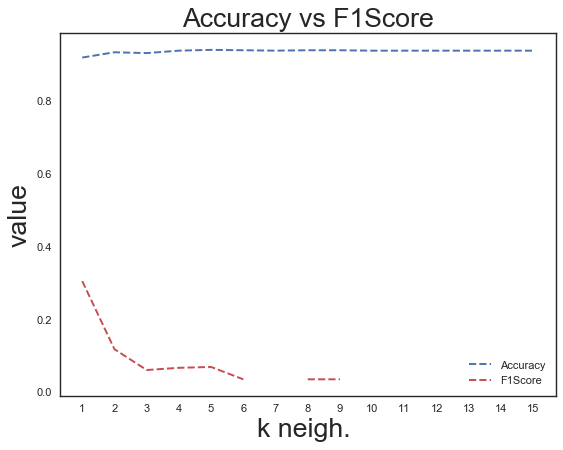

In [31]:
#### to run convert this cell from mardown to code  
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('k neigh. ')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [33]:
print()
print("Decision Tree:")
depthValues =  [5,10,15,20,30,40,50,100,150,200]

accValues = []
f1Values = []

for depth in depthValues:
    print("max_depth: " + str(depth))
    dt = tree.DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
    dt.fit(X_train,y_train);
    #Train
    predictions = dt.predict(X_train)
    acc = mt.accuracy_score(predictions,y_train)
    accValues.append(acc)
    print( "Training Accuracy: " + str(acc))        
    
    #Test
    predictions = dt.predict(X_val)
    print("Test Accuracy:")
    print(mt.accuracy_score(predictions,y_val))
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()


Decision Tree:
max_depth: 5
Training Accuracy: 0.945679012345679
Test Accuracy:
0.9377777777777778
Precision on test 0.50
Recall on test  0.05
F1    0.10

max_depth: 10
Training Accuracy: 0.9580246913580247
Test Accuracy:
0.9366666666666666
Precision on test 0.46
Recall on test  0.11
F1    0.17

max_depth: 15
Training Accuracy: 0.9709876543209877
Test Accuracy:
0.9311111111111111
Precision on test 0.31
Recall on test  0.09
F1    0.14

max_depth: 20
Training Accuracy: 0.9779012345679012
Test Accuracy:
0.93
Precision on test 0.29
Recall on test  0.09
F1    0.14

max_depth: 30
Training Accuracy: 0.9912345679012345
Test Accuracy:
0.9233333333333333
Precision on test 0.30
Recall on test  0.18
F1    0.22

max_depth: 40
Training Accuracy: 0.9960493827160494
Test Accuracy:
0.9244444444444444
Precision on test 0.32
Recall on test  0.20
F1    0.24

max_depth: 50
Training Accuracy: 0.9992592592592593
Test Accuracy:
0.9244444444444444
Precision on test 0.35
Recall on test  0.25
F1    0.29

max_de

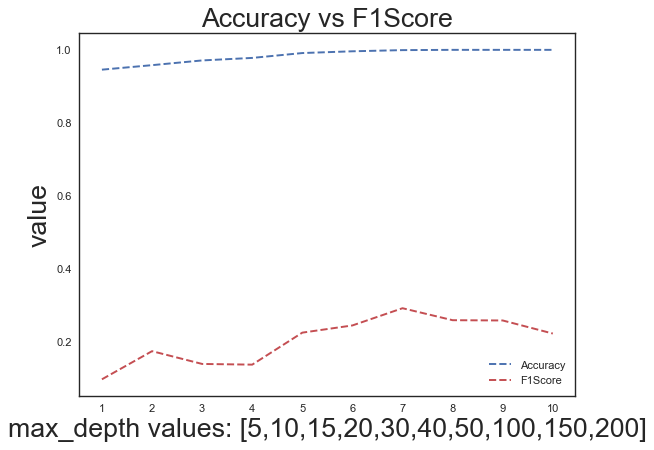

In [34]:
#### to run convert this cell from mardown to code  
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,len(depthValues)+1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('max_depth values: [5,10,15,20,30,40,50,100,150,200]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## Random Forest

In [35]:
# Import Random Forest model and fit it to the train set
from sklearn.ensemble import RandomForestClassifier

C:\Users\pierv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
print()
print("Random Forest:")
estimatorsValues= [10,20,40,80,100,150]
max_depthValues = [5,10,20,30,50]
accValues = []
f1Values = []

for estimator in estimatorsValues:
    for depth in max_depthValues:
        
        #Train
        print("#estimators: " + str(estimator) + "  max_depth: " + str(depth))
        rf = RandomForestClassifier(n_estimators = estimator, max_depth = depth, criterion = "gini")
        rf.fit(X_train, y_train);

        predictions = rf.predict(X_train)
        # check accuracy
        trainacc = mt.accuracy_score(predictions,y_train)
        print("Training Accuracy: " + str(trainacc))
        
        #Test
        predictions = rf.predict(X_val)
        print("Test Accuracy:")
        acc =mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)
        print()
        


Random Forest:
#estimators: 10  max_depth: 5
Training Accuracy: 0.9379012345679012
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
Recall on test  0.00
F1    nan

#estimators: 10  max_depth: 10
Training Accuracy: 0.9380246913580247
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
Recall on test  0.00
F1    nan

#estimators: 10  max_depth: 20
Training Accuracy: 0.9388888888888889
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
Recall on test  0.00
F1    nan

#estimators: 10  max_depth: 30
Training Accuracy: 0.9403703703703704
Test Accuracy:
0.9377777777777778
Precision on test 0.00
Recall on test  0.00
Recall on test  0.00
F1    nan

#estimators: 10  max_depth: 50
Training Accuracy: 0.9501234567901234
Test Accuracy:
0.9366666666666666
Precision on test 0.00
Recall on test  0.00
Recall on test  0.00
F1    nan

#estimators: 20  max_depth: 5
Training Accuracy: 0.9379012345679012
Test Accuracy:
0.93777

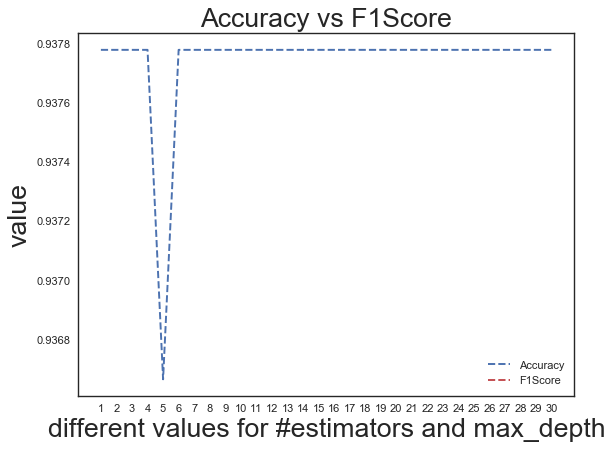

In [37]:
#### to run convert this cell from mardown to code  
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('different values for #estimators and max_depth')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Oversampling

One thing that we can try to improve the precision and recall scores is Oversampling of the positive class.
We will apply oversampling only on the training set and leave the natural distribution of the data in the test set and validation set.

In [38]:
from pandas import *
df_train= concat([X_train, y_train], axis=1, sort=False)
df_train.head()

,!,"!""?","""","""/proj3/mypipe""","""100%","""104""","""200","""700000""","""?","""a",...,“writing”,…,…just,…only,₹,"₹15,000",√,√3√3√3√3√3?,❓?,TARGET
6374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()
print("number of negative instances:")
print(count_class_0)
print("number of positive instances:")
print(count_class_1)

print("percentange of positive: " + str(round(count_class_1*100/(count_class_0 + count_class_1),2)))

number of negative instances:
7597
number of positive instances:
503
percentange of positive: 6.21


In [40]:
# Divide by class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

In [41]:
print("Performing Oversampling...")
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

count_class_0, count_class_1 = train_over.TARGET.value_counts()
print("number of negative instances:")

print(count_class_0)
print("number of positive instances:")

print(count_class_1)

print("percentange of positive: " + str(round(count_class_1*100/(count_class_0 + count_class_1),2)))

Performing Oversampling...
number of negative instances:
7597
number of positive instances:
7597
percentange of positive: 50.0


In [42]:
#split again in X_train, y_train
y_train = train_over['TARGET']
variables = train_over.columns[dataset.columns!='TARGET']
X_train = train_over[variables]


#### Let's check again the performance of the models:

# Naive Bayes

In [43]:
print()
print("Naive Bayes:")
model = MultinomialNB().fit(X_train, y_train) 
#Train Accuracy
predicted = model.predict(X_train)
print("Train Accuracy:")
print(np.mean(predicted == y_train)) 

#Test Accuracy
predicted = model.predict(X_test)
print("Test Accuracy:")
print(np.mean(predicted == y_test)) 


Naive Bayes:
Train Accuracy:
0.9732131104383309
Test Accuracy:
0.898


In [44]:
print("Confusion Matrix - Naive Bayes ")
PrintConfusionMatrix(model, y_test, predicted)

Confusion Matrix - Naive Bayes 
	0	1
0	 855 	 83
1	 19 	 43


In [45]:
print("Precision %3.2f" % precision_score(y_test,predicted))
print("Recall    %3.2f" % recall_score(y_test,predicted))
print("F1    %3.2f" % F1Score( precision_score(y_test,predicted), recall_score(y_test,predicted)))

Precision 0.34
Recall    0.69
F1    0.46


# Logistic Regression

In [46]:
print()
print("Logistic Regression:")
ln = LogisticRegression(solver = 'liblinear')
ln.fit(X_train, y_train);
predictions = ln.predict(X_train)
# check  training accuracy
import sklearn.metrics as mt
acc = mt.accuracy_score(predictions,y_train)
print( "Training Accuracy: " + str(acc))


Logistic Regression:
Training Accuracy: 0.9977622745820719


In [47]:
scores = cross_val_score(ln, X_train, y_train, cv=10)
#print(scores)
print("Test Accuracy with CV: " + str(scores.mean()))

Test Accuracy with CV: 0.9799920255183414


In [48]:
ln.fit(X_train, y_train);
predictions = ln.predict(X_val)
print("Confusion Matrix - Logistic Regression")
PrintConfusionMatrix(ln, y_val, predictions)

Confusion Matrix - Logistic Regression
	0	1
0	 817 	 27
1	 30 	 26


In [49]:
print("Precision %3.2f" % precision_score(y_val,predictions))
print("Recall    %3.2f" % recall_score(y_val,predictions))
print("F1    %3.2f" % F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions)))

Precision 0.49
Recall    0.46
F1    0.48


# Ridge

In [50]:
print()
print("Ridge:")
alphaValue = [0.1,1,10,20,40,80,160,250]
accValues = []
f1Values = []

for alph in alphaValue:
    
    #Train
    clf = RidgeClassifier(alpha=alph)
    clf.fit(X_train, y_train)
    print("alpha: " + str(alph))
    print()
    predictions = clf.predict(X_train) 
    acc = mt.accuracy_score(predictions,y_train)
    print( "Training Accuracy: " + str(acc))
    
    #Test
    predictions = clf.predict(X_val)
    accTest = mt.accuracy_score(predictions,y_val)
    accValues.append(accTest)
    print("Test Accuracy: " + str(accTest))
    
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1score)
    print("F1    %3.2f" % f1score )

    print()


Ridge:
alpha: 0.1

Training Accuracy: 1.0
Test Accuracy: 0.9422222222222222
Precision on test 0.57
Recall on test  0.30
F1    0.40

alpha: 1

Training Accuracy: 1.0
Test Accuracy: 0.9433333333333334
Precision on test 0.58
Recall on test  0.34
F1    0.43

alpha: 10

Training Accuracy: 0.9971041200473871
Test Accuracy: 0.9388888888888889
Precision on test 0.51
Recall on test  0.41
F1    0.46

alpha: 20

Training Accuracy: 0.9904567592470712
Test Accuracy: 0.9333333333333333
Precision on test 0.47
Recall on test  0.48
F1    0.47

alpha: 40

Training Accuracy: 0.9797946557851783
Test Accuracy: 0.9244444444444444
Precision on test 0.41
Recall on test  0.52
F1    0.46

alpha: 80

Training Accuracy: 0.961300513360537
Test Accuracy: 0.91
Precision on test 0.37
Recall on test  0.61
F1    0.46

alpha: 160

Training Accuracy: 0.9305646965907595
Test Accuracy: 0.8922222222222222
Precision on test 0.32
Recall on test  0.68
F1    0.44

alpha: 250

Training Accuracy: 0.9091746742135053
Test Accuracy

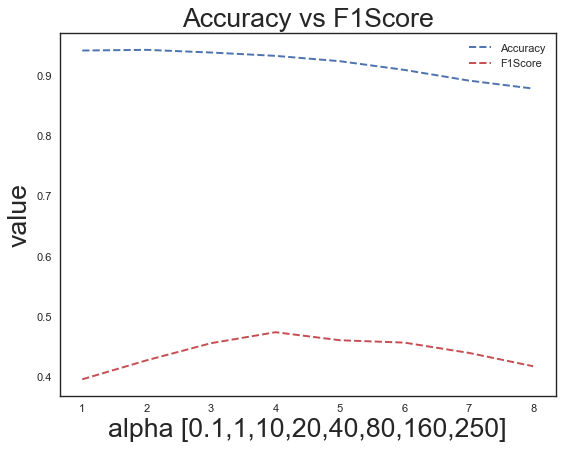

In [51]:
#### to run convert this cell from mardown to code  

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.1,1,10,20,40,80,160,250]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Lasso

In [52]:
print()
print("Lasso:")
alphaValue = [0.0001, 0.0005, 0.001, 0.01,0.1]
accValues = []
f1Values = []

for alph in alphaValue:

    #Train
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X_train,y_train);
    predictions = clf.predict(X_train)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("alpha: " + str(alph))
    print("Train Accuracy:")
    print(mt.accuracy_score(predictions,y_train))
    
    #Test
    predictions = clf.predict(X_val)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    print(acc)
    accValues.append(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score =  F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" % f1Score)

    print()


Lasso:
alpha: 0.0001
Train Accuracy:
0.988613926549954
Test Accuracy:
0.94
Precision on test 0.52
Recall on test  0.45
F1    0.48

alpha: 0.0005
Train Accuracy:
0.9295774647887324
Test Accuracy:
0.8977777777777778
Precision on test 0.34
Recall on test  0.68
F1    0.45

alpha: 0.001
Train Accuracy:
0.8515861524285903
Test Accuracy:
0.8655555555555555
Precision on test 0.28
Recall on test  0.71
F1    0.40

alpha: 0.01
Train Accuracy:
0.7501645386336712
Test Accuracy:
0.7766666666666666
Precision on test 0.17
Recall on test  0.66
F1    0.27

alpha: 0.1
Train Accuracy:
0.5
Test Accuracy:
0.06222222222222222
Precision on test 0.06
Recall on test  1.00
F1    0.12



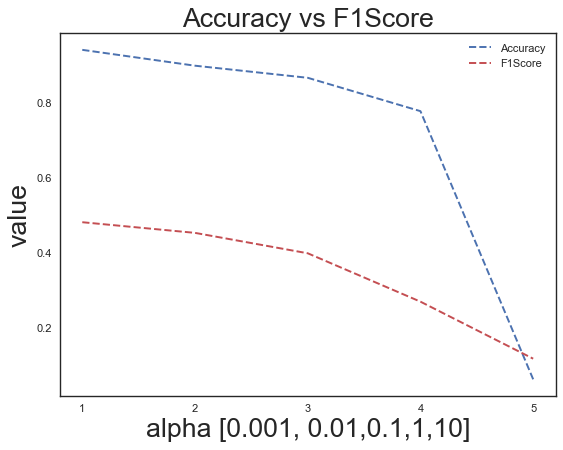

In [53]:
#### to run convert this cell from mardown to code  

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.001, 0.01,0.1,1,10]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# KNN

In [ ]:
print()
print("KNN:")
k_range = list(range(1, 30))
accValues = []
f1Values = []
for k in k_range:
    if (k%2 == 1):
        print("k = " + str(k))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train);
        # fit the model with data
        predictions = knn.predict(X_val)
        
        print("Test Accuracy:")
        acc = mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)

        print()




KNN:
k = 1
Test Accuracy:
0.9188888888888889
Precision on test 0.32
Recall on test  0.27
F1    0.29

k = 3
Test Accuracy:
0.9044444444444445
Precision on test 0.26
Recall on test  0.29
F1    0.27

k = 5
Test Accuracy:
0.89
Precision on test 0.22
Recall on test  0.30
F1    0.26

k = 7
Test Accuracy:
0.8788888888888889
Precision on test 0.21
Recall on test  0.34
F1    0.26

k = 9
Test Accuracy:
0.8644444444444445
Precision on test 0.19
Recall on test  0.38
F1    0.26

k = 11
Test Accuracy:
0.8566666666666667
Precision on test 0.19
Recall on test  0.39
F1    0.25

k = 13
Test Accuracy:
0.85
Precision on test 0.19
Recall on test  0.43
F1    0.26

k = 15
Test Accuracy:
0.8411111111111111
Precision on test 0.18
Recall on test  0.43
F1    0.25

k = 17
Test Accuracy:
0.8333333333333334
Precision on test 0.17
Recall on test  0.43
F1    0.24

k = 19
Test Accuracy:
0.8255555555555556
Precision on test 0.16
Recall on test  0.41
F1    0.23

k = 21


In [ ]:
#### to run convert this cell from mardown to code  

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('k neigh. ')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Decision Trees

In [ ]:
print()
print("Decision Tree:")
depthValues =  [1,2,3,5,10,15,20,30,40,50,100,150,200]

accValues = []
f1Values = []

for depth in depthValues:
    print("max_depth: " + str(depth))
    dt = tree.DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
    dt.fit(X_train,y_train);
    #Train
    predictions = dt.predict(X_train)
    acc = mt.accuracy_score(predictions,y_train)
    accValues.append(acc)
    print( "Training Accuracy: " + str(acc))        
    
    #Test
    predictions = dt.predict(X_val)
    print("Test Accuracy:")
    print(mt.accuracy_score(predictions,y_val))
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()


In [ ]:
#### to run convert this cell from mardown to code  

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,len(depthValues)+1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('max_depth values: [1,2,3,5,10,15,20,30,40,50,100,150,200]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Random Forest

In [ ]:
print()
print("Random Forest:")
estimatorsValues= [10,20,40,80,100,150,180]
max_depthValues = [5,10,20,30,50,80,100]
accValues = []
f1Values = []

for estimator in estimatorsValues:
    for depth in max_depthValues:
        
        #Train
        print("#estimators: " + str(estimator) + "  max_depth: " + str(depth))
        rf = RandomForestClassifier(n_estimators = estimator, max_depth = depth, criterion = "gini")
        rf.fit(X_train, y_train);

        predictions = rf.predict(X_train)
        # check accuracy
        trainacc = mt.accuracy_score(predictions,y_train)
        print("Training Accuracy: " + str(trainacc))
        
        #Test
        predictions = rf.predict(X_val)
        print("Test Accuracy:")
        acc =mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)
        print()

In [ ]:
#### to run convert this cell from mardown to code  

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('different values for #estimators and max_depth')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# SVM

from sklearn.svm import SVC
CValues = [0.1, 1, 5, 10, 20, 40, 70]
accValues = []
f1Values = []

for c in CValues:
    print("C = " + str(c))
    svmC = SVC(gamma= 'auto', C = c, kernel='rbf')
    svmC.fit(X_train, y_train)
    predictions = svmC.predict(X_train)
    # check accuracy
    trainacc = mt.accuracy_score(predictions,y_train)
    print("Training Accuracy: " + str(trainacc))
        
    #Test
    predictions = svmC.predict(X_val)
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    accValues.append(acc)
    print(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()

plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('C = [0.1, 1, 5, 10, 20, 40, 70]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()